### 1. Start the Environment

We begin by importing some necessary packages. If the code cell below returns an error, please revisit the project instructions to double-check that you have installed Unity ML-Agents and NumPy.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:')
print(state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like:
[1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. RL Agent & Model

### Model
#### model: model.py

model.py contains the neural network model that serve as the q-value approximation.<br>
It's a simple 3-layers fully-connected neural network of size (64x64x4).

Since we are not working with the pixel input, this should be sufficient (no need for a conv layer) 

### Agents

We implement a double-DQN agent (dqn_agent_double.py) where the target Q-value is caculated using both the target and the local network. Our agent is implement using a soft-update instead of a typical update after some fix periods. The hyper-paremeters are as followed:

- BUFFER_SIZE = int(1e4)  
- BATCH_SIZE = 64         
- GAMMA = 0.99            
- TAU = 5e-3              
- LR  = 5e-4              
- UPDATE_EVERY = 4     


In [5]:
from dqn_agent_double import AgentDouble

dagent = AgentDouble(state_size=state_size, action_size=action_size, seed=0)

In [6]:
def run_episode(env, agent):
    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action     = agent.act(state)
        env_info   = env.step(action)[brain_name]      # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done   = env_info.local_done[0]                # see if episode has finished

        agent.step(state, action, reward, next_state, done) # agent learn sth...

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    return score

In [7]:
# train the vanilla agent
dagent_scores = []
for i in range(500):
    epi_score = run_episode(env, dagent)
    dagent_scores += [epi_score]
    if (i % 10) == 0:
        avg_score = np.mean(dagent_scores[-100:])
        print('%d: %f' % (i, avg_score))

0: 0.000000
10: 0.000000
20: -0.047619
30: 0.064516
40: 0.146341
50: 0.450980
60: 0.967213
70: 1.591549
80: 2.481481
90: 3.065934
100: 3.660000
110: 4.870000
120: 5.690000
130: 6.700000
140: 7.910000
150: 9.060000
160: 10.130000
170: 10.580000
180: 10.870000
190: 11.420000
200: 11.980000
210: 12.170000
220: 12.700000
230: 12.860000
240: 12.980000
250: 13.030000
260: 13.020000
270: 13.490000
280: 13.660000
290: 13.830000
300: 13.810000
310: 14.050000
320: 14.290000
330: 14.730000
340: 14.860000
350: 15.020000
360: 15.310000
370: 15.340000
380: 15.460000
390: 15.480000
400: 15.710000
410: 15.640000
420: 15.610000
430: 15.710000
440: 15.760000
450: 15.600000
460: 15.660000
470: 15.460000
480: 15.600000
490: 15.440000


### 4. Performance

A plot of rewards per episode illustrate that the agent is able to receive an average reward (over 100 episodes) of at least +13. The agent is able to solve the environment in around 250 episodes. After 500 episodes, the average scores over 100 episodes is around 15.44

The resulting weights of the underlying network is saved at 'dagent.pt'

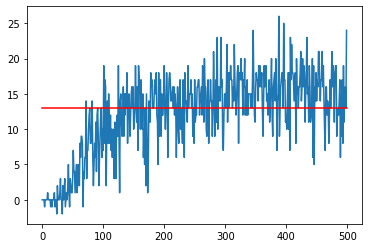

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

line = [13 for x in np.arange(0,500)]
plt.plot(dagent_scores)
plt.plot(line, color='red')
plt.show()

In [10]:
dagent.save_model('dagent.pt')

In [11]:
env.close()